<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Trabajo Fin de Master</header1></center>
<left><h1>5. Desarrollo específico de la contribución</header1></left>

**Presentado por:  Andres Mauricio Triana Sanchez** <br>
**Fecha: 20/06/2024**

## Importación de librerias necesarias

In [1]:
# Para esta actividad se importarán las siguientes librerías:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics
import pydotplus
import category_encoders as cencoders
import seaborn as sns
import numpy as np
import hvplot.pandas
import os
import warnings
warnings.filterwarnings('ignore')

## Cargar el Dataset

In [2]:
# Código para cargar el Dataset
url = 'Data2023ModelosPrediccion.xlsx'
dataset = pd.read_excel(url)

In [3]:
# Visualizamos los datos que cargamos
dataset

,Month,Week,tenant-id,TenantName,VendorName,InvoiceTotal,InvoiceNet,DocumentType,CashFlow,NumberTransaction
0,2,7,59,Creative Office Resources,"Dirtt Environmental Solutions, Inc.",23.31142,21.28642,Bill,Net 120 Days,1
1,2,7,32,Workscapes,OpenWorks,1.93715,1.93715,Operating Bill,Net 120 Days,1
2,2,7,43,Forward Tilt,Architex,0.17112,0.11000,Bill,Net 120 Days,1
3,2,8,32,Workscapes,ERG INTERNATIONAL INC.,1.41040,1.41040,Bill,Net 120 Days,1
4,4,15,14,Goengineer,Dassault Systemes Americas Corp,5.50200,5.50200,Bill,Net 360 Days,1
...,...,...,...,...,...,...,...,...,...,...
289804,12,51,14,Goengineer,Dassault Systemes Americas Corp,1.67400,1.67400,Bill,Net 15 Days,1
289805,11,47,14,Goengineer,Dassault Systemes Americas Corp,4.65103,4.65103,Bill,Net 0 Days,1
289806,5,18,32,Workscapes,"First Class Moving Systems, Inc.",7.34400,7.34400,Operating Bill,Net 0 Days,1
289807,11,47,6,iSpace,Teknion LLC,2.71408,2.13704,Bill,Net 15 Days,1


## Explique el problema de clasificación a resolver. 
**Descripción del problema:** Predicir el flujo de efectivo para un determinado periodo del año.

**Variable objetivo (class):**
> **CashFlow**. Flujo de Efectivo. Valores:
>- Net 0 Days
>- Net 15 Days
>- Net 30 Days
>- Net 60 Days
>- Net 120 Days
>- Net 180 Days
>- Net 360 Days
>- Net +360 Days

**Variables de entrada:** Son cinco(5)
> **Month**. Mes del año. Valores: desde 01 hasta 12.

> **tenant-id**. Id Intermediario.

> **vendor-id**. Id Vendedor.

> **InvoiceNet**. Facturación Neta.

> **DocumentType**. Tipo de Documento. Valores: 
>- Acknowledgment (6)
>- Bill (1)
>- Credit Memo (4)
>- Customer Invoice (5)
>- Operating Bill (2)
>- Proforma (3)


## Explique los problemas de regresión a resolver. 
**Descripción del problema 1:** Predicir el numero de transacciones comerciales para un determinado periodo del año.

**Variable objetivo (salida):**
> **totalTransactions**. Total Transacciones. 

**Variables de entrada:** Son cinco(5)
> **Month**. Mes del año. Valores: desde 01 hasta 12.

> **tenant-id**. Id Intermediario.

> **vendor-id**. Id Vendedor.

> **totalInvoiceNet**. Facturación Neta.

> **TypeDocument-id**. Id Tipo de Documento.


**Descripción del problema 2:** Predicir el valor de la facturación neta para un determinado periodo del año.

**Variable objetivo (salida):**
> **totalInvoiceNet**. Total Facturación Neta. 

**Variables de entrada:** Son cinco(5)
> **Month**. Mes del año. Valores: desde 01 hasta 12.

> **tenant-id**. Id Intermediario.

> **vendor-id**. Id Vendedor.

> **totalInvoiceNet**. Total Facturacion Neta.

> **TypeDocument-id**. Id Tipo de Documento.


## Caracterización del Dataset

**Primera transformación del conjunto de datos (Algoritmo de Regresión):** 
>- Convertir las variables categoricas ['VendorName', 'DocumentType', 'CashFlow'] en variables  numericas.
>- Eliminar columnas ['Week', 'TenantName', 'InvoiceTotal','CashFlow']
>- Renombrar columnas {'VendorName': 'vendor-id', 'DocumentType': 'documentType-id'}
>- Crear las columnas 'totalInvoiceNet', 'totalNumberTransactions' con los valores acumulados de 'InvoiceNet', 'NumberTransaction'

In [4]:
encoder = cencoders.OrdinalEncoder(cols=['VendorName', 'DocumentType', 'CashFlow'])
dataregresion = encoder.fit_transform(dataset)

In [5]:
dataregresion.drop(columns=['Week', 'TenantName', 'InvoiceTotal','CashFlow'], inplace=True)

In [6]:
dataregresion.rename(columns={'VendorName': 'vendor-id', 'DocumentType': 'documentType-id', 'InvoiceNet': 'totalInvoiceNet', 'NumberTransaction': 'totalTransactions'}, inplace=True)

In [7]:
datatmp = dataregresion.groupby(['Month','tenant-id','vendor-id', 'documentType-id']).aggregate({'totalInvoiceNet':'sum','totalTransactions':'sum'})

In [8]:
# Restablecer los datos para el algoritmo de regresion
dataregresion = datatmp.reset_index()

In [9]:
# Visualizamos la primera transformación
dataregresion

,Month,tenant-id,vendor-id,documentType-id,totalInvoiceNet,totalTransactions
0,1,4,9,3,52.09029,1
1,1,4,10,1,177.74278,29
2,1,4,13,1,350.79980,17
3,1,4,14,1,20.14600,2
4,1,4,17,1,12.73039,13
...,...,...,...,...,...,...
51238,12,61,9655,1,1.19020,1
51239,12,61,10142,1,0.17415,1
51240,12,64,247,1,1404.88099,81
51241,12,64,346,1,25.10685,2


**Segunda transformación del conjunto de datos (Algoritmo de Clasificacion):** 
>- Convertir las variables categoricas ['VendorName'] en variables  numericas.
>- Eliminar columnas ['Week', 'TenantName', 'InvoiceTotal', 'NumberTransaction']
>- Renombrar columnas {'VendorName': 'vendor-id'}

In [10]:
encoder = cencoders.OrdinalEncoder(cols=['VendorName','DocumentType'])
dataclasificacion = encoder.fit_transform(dataset)

In [11]:
dataclasificacion.drop(columns=['Week', 'TenantName', 'InvoiceTotal', 'NumberTransaction'], inplace=True)

In [12]:
dataclasificacion.rename(columns={'VendorName': 'vendor-id', 'DocumentType': 'documentType-id'}, inplace=True)

In [13]:
# Visualizamos la segunda transformación
dataclasificacion

,Month,tenant-id,vendor-id,InvoiceNet,documentType-id,CashFlow
0,2,59,1,21.28642,1,Net 120 Days
1,2,32,2,1.93715,2,Net 120 Days
2,2,43,3,0.11000,1,Net 120 Days
3,2,32,4,1.41040,1,Net 120 Days
4,4,14,5,5.50200,1,Net 360 Days
...,...,...,...,...,...,...
289804,12,14,5,1.67400,1,Net 15 Days
289805,11,14,5,4.65103,1,Net 0 Days
289806,5,32,1677,7.34400,2,Net 0 Days
289807,11,6,247,2.13704,1,Net 15 Days


**Distribución por clases de la variable objetivo CashFlow y el número de instancias por clase:**

In [14]:
print(dataset.groupby('CashFlow').size())

CashFlow
Net 0 Days        58270
Net 120 Days       9552
Net 15 Days      189216
Net 180 Days       3512
Net 30 Days       10053
Net 360 Days       3379
Net 60 Days       15658
Net >360 Days       169
dtype: int64


**Consultamos la información que nos proporciona el conjunto de datos para el algoritmo de clasificación.**

In [15]:
dataclasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289809 entries, 0 to 289808
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Month            289809 non-null  int64  
 1   tenant-id        289809 non-null  int64  
 2   vendor-id        289809 non-null  int32  
 3   InvoiceNet       289809 non-null  float64
 4   documentType-id  289809 non-null  int32  
 5   CashFlow         289809 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(1)
memory usage: 11.1+ MB


**Consultamos la información que nos proporciona el conjunto de datos para el algoritmo de regresión.**

In [16]:
dataregresion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              51243 non-null  int64  
 1   tenant-id          51243 non-null  int64  
 2   vendor-id          51243 non-null  int32  
 3   documentType-id    51243 non-null  int32  
 4   totalInvoiceNet    51243 non-null  float64
 5   totalTransactions  51243 non-null  int64  
dtypes: float64(1), int32(2), int64(3)
memory usage: 2.0 MB


**Se grafica la variable CashFlow respecto a su relación con los meses del año**

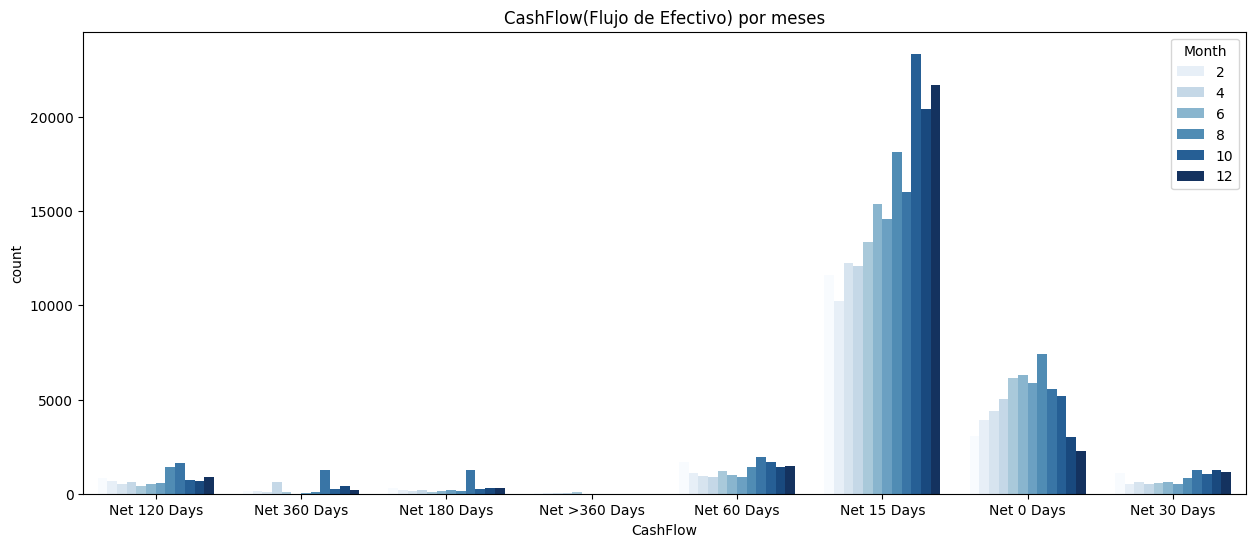

In [17]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.countplot(x ='CashFlow', hue = "Month", data = dataclasificacion, palette='Blues')
plt.title("CashFlow(Flujo de Efectivo) por meses")
plt.show()

**Se grafica la variable CashFlow respecto a su relación con DocumentType**

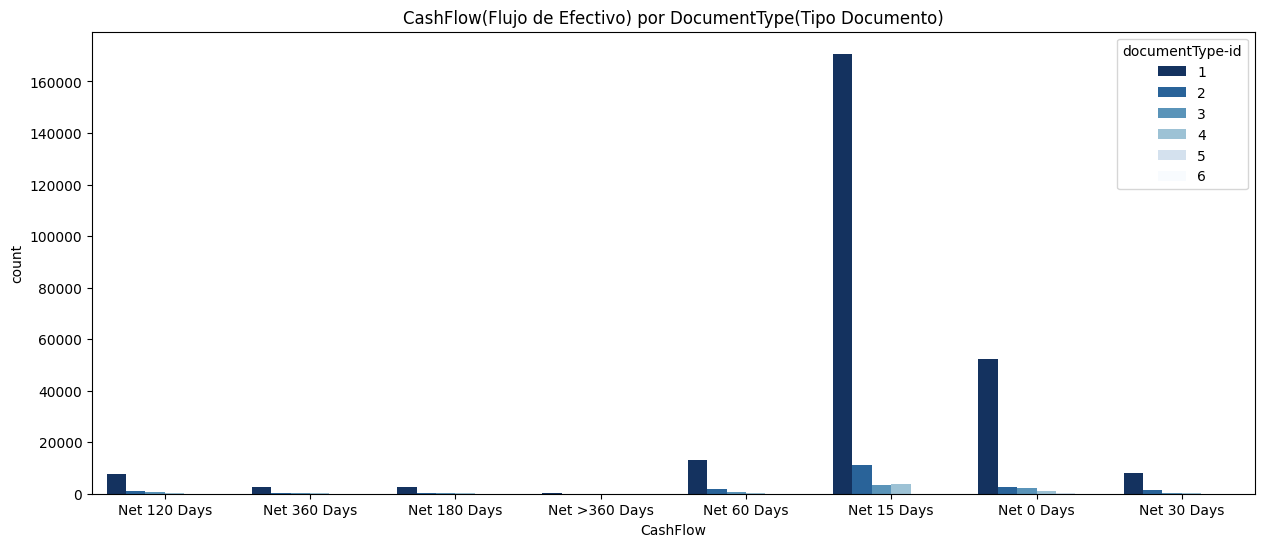

In [19]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.countplot(x ='CashFlow', hue = "documentType-id", data = dataclasificacion, palette='Blues_r')
plt.title("CashFlow(Flujo de Efectivo) por DocumentType(Tipo Documento)")
plt.show()

**Se grafica la variable totalTransactions respecto a su relación con los meses del año**

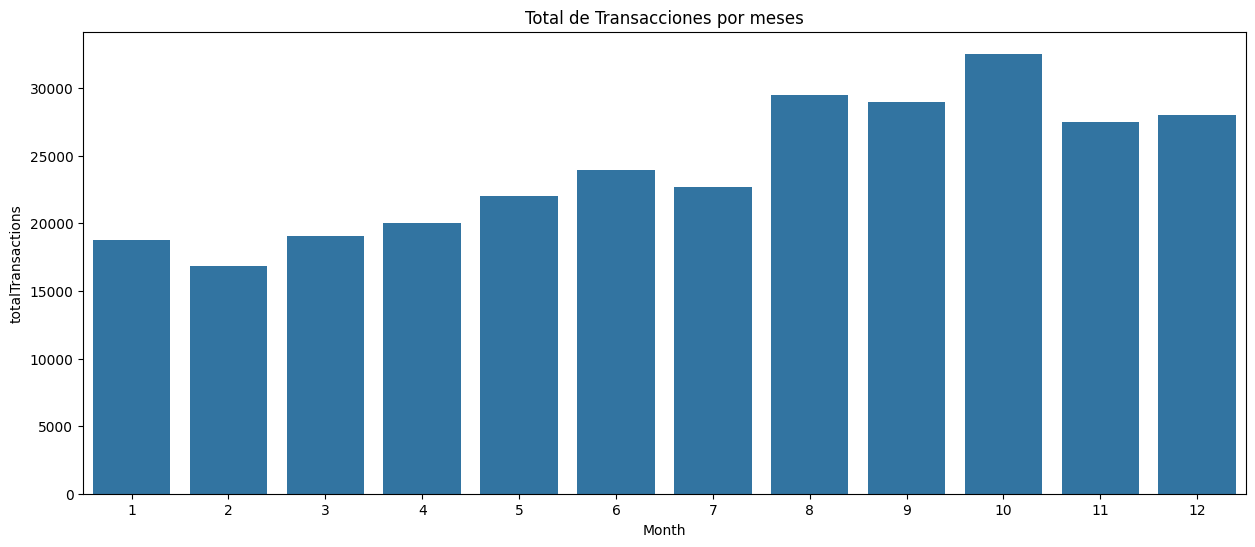

In [20]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.barplot(dataregresion, x="Month", y="totalTransactions", estimator="sum", errorbar=None)
plt.title("Total de Transacciones por meses")
plt.show()

**Se grafica la variable totalInvoiceNet respecto a su relación con los meses del año**

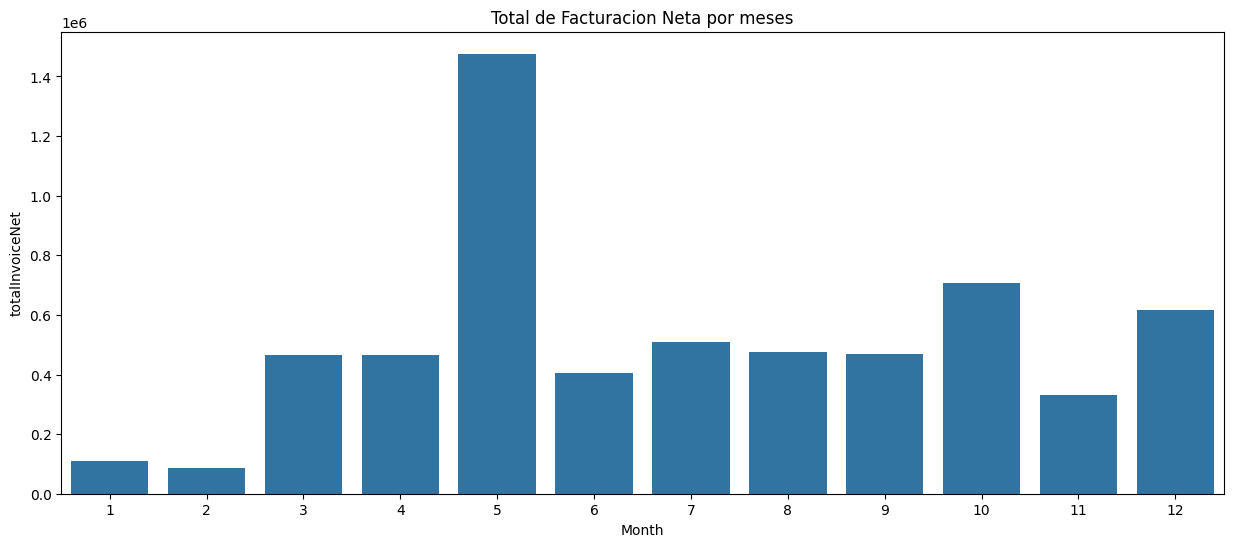

In [21]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.barplot(dataregresion, x="Month", y="totalInvoiceNet", estimator="sum", errorbar=None)
plt.title("Total de Facturacion Neta por meses")
plt.show()

**Diagramas de cajas y bigotes para los atributos de entrada del algoritmo de regregsión**

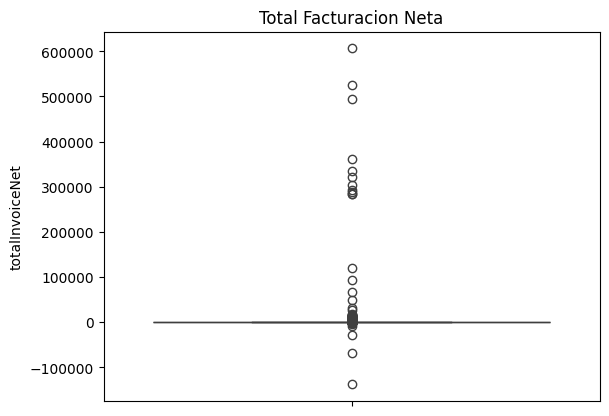

In [22]:
sns.boxplot(y = 'totalInvoiceNet', data = dataregresion)
plt.title("Total Facturacion Neta")
pyplot.show()

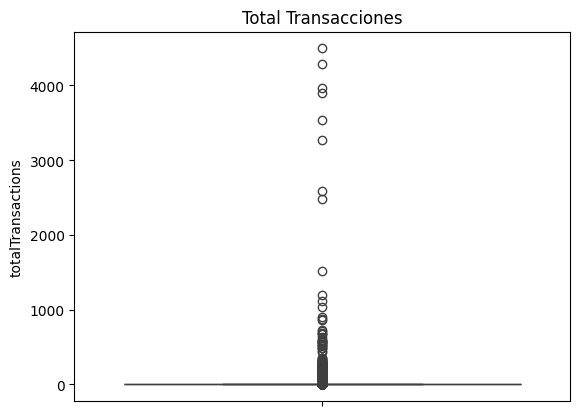

In [23]:
sns.boxplot(y = 'totalTransactions', data = dataregresion)
plt.title("Total Transacciones")
pyplot.show()

**Gráficos multivariable con la matriz de dispersión para el conjunto de datos del algoritmo de regresión**

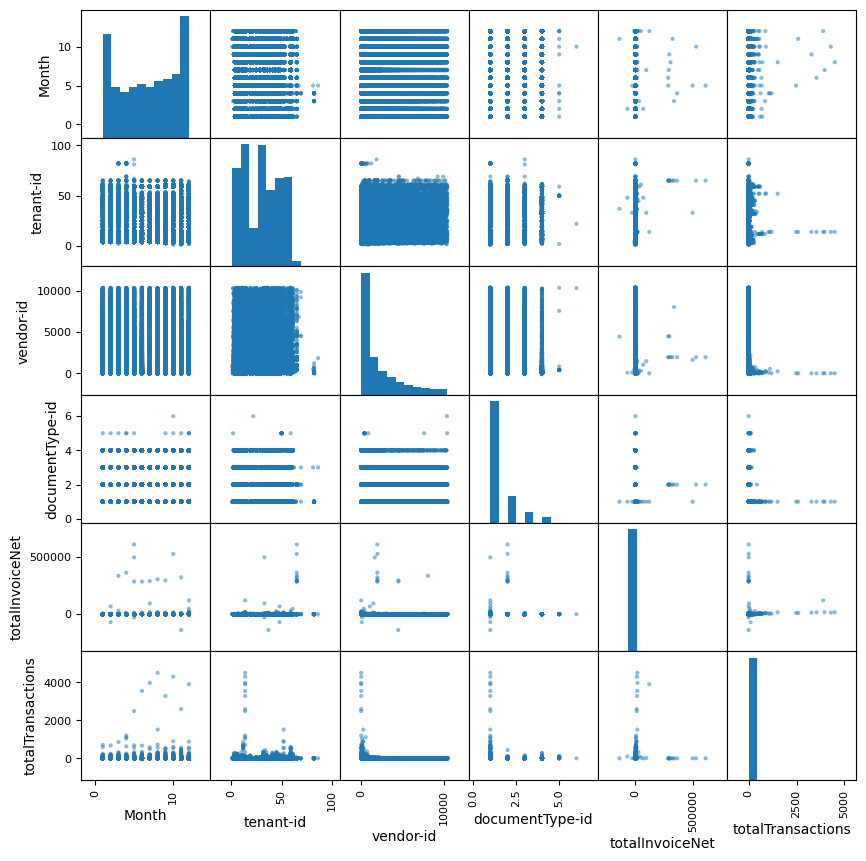

In [24]:
scatter_matrix(dataregresion, range_padding=0.50, figsize=(10.0,10.0))
pyplot.show()

**Gráficos multivariable con la matriz de dispersión para el conjunto de datos del algoritmo de clasificación**

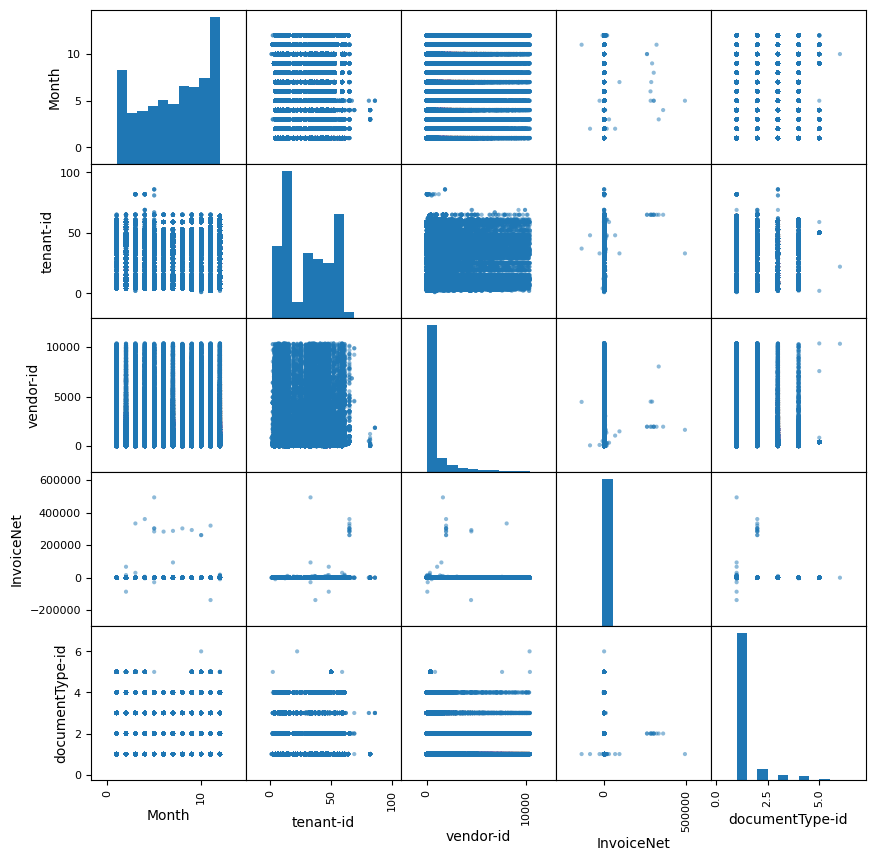

In [25]:
scatter_matrix(dataclasificacion, range_padding=0.50, figsize=(10.0,10.0))
pyplot.show()

**Se grafica la Matriz de Correlación (Relación entre los atributos) para el conjunto de datos del algortimo de regresión**

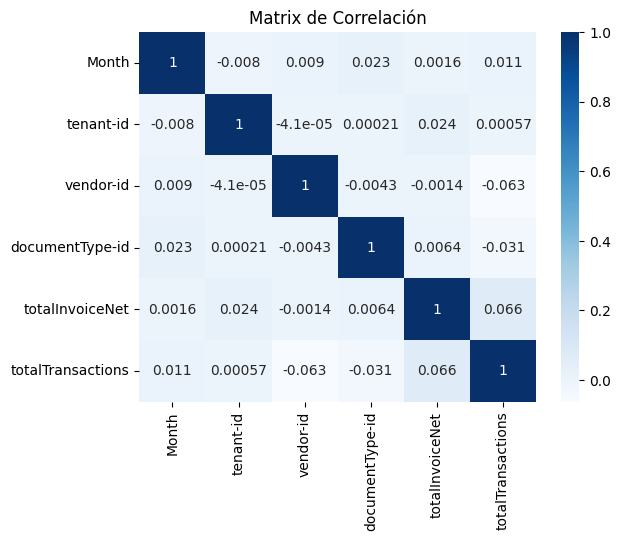

In [26]:
sns.heatmap(data=dataregresion.corr(), cmap="Blues", annot=True)
plt.title("Matrix de Correlación")
plt.show()

**Se ordenan descendentemente la correllación para totalTransactions**

In [27]:
tmp=dataregresion.corr()
tmp['totalTransactions'].sort_values(ascending=False)

totalTransactions    1.000000
totalInvoiceNet      0.065788
Month                0.011245
tenant-id            0.000569
documentType-id     -0.031389
vendor-id           -0.062735
Name: totalTransactions, dtype: float64

**Se ordenan descendentemente la correllación para totalInvoiceNet**

In [28]:
tmp['totalInvoiceNet'].sort_values(ascending=False)

totalInvoiceNet      1.000000
totalTransactions    0.065788
tenant-id            0.024385
documentType-id      0.006408
Month                0.001615
vendor-id           -0.001371
Name: totalInvoiceNet, dtype: float64

**Se grafica la Matriz de Correlación (Relación entre los atributos) para el conjunto de datos del algortimo de clasificación**

>- Convertir las variables categoricas ['CashFlow'] en variables  numericas.

In [33]:
encoder = cencoders.OrdinalEncoder(cols=['CashFlow'])
tmp = encoder.fit_transform(dataclasificacion)

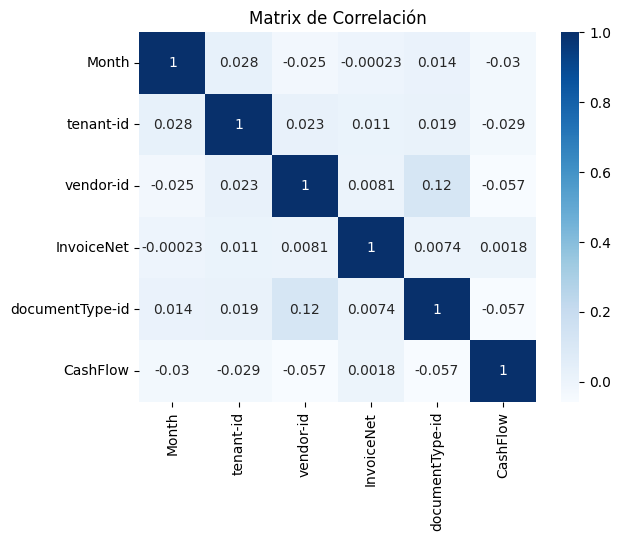

In [34]:
sns.heatmap(data=tmp.corr(), cmap="Blues", annot=True)
plt.title("Matrix de Correlación")
plt.show()

**Se ordenan descendentemente la correllación para CashFlow**

In [36]:
tmp.corr()['CashFlow'].sort_values(ascending=False)

CashFlow           1.000000
InvoiceNet         0.001796
tenant-id         -0.029437
Month             -0.030203
vendor-id         -0.056564
documentType-id   -0.057300
Name: CashFlow, dtype: float64

**Resumen estadístico de los datos:**

In [37]:
dataregresion.describe()

,Month,tenant-id,vendor-id,documentType-id,totalInvoiceNet,totalTransactions
count,51243.000000,51243.000000,51243.000000,51243.000000,51243.000000,51243.000000
mean,6.767305,30.462795,2218.590793,1.406631,119.407808,5.655582
std,3.491170,18.072614,2572.534895,0.772513,5783.279252,50.567506
min,1.000000,1.000000,1.000000,1.000000,-137616.749460,1.000000
25%,4.000000,12.000000,290.000000,1.000000,0.643500,1.000000
50%,7.000000,32.000000,1099.000000,1.000000,3.058950,2.000000
75%,10.000000,45.000000,3319.500000,2.000000,13.800000,3.000000
max,12.000000,86.000000,10366.000000,6.000000,606407.698000,4497.000000


In [38]:
dataclasificacion.describe()

,Month,tenant-id,vendor-id,InvoiceNet,documentType-id
count,289809.000000,289809.000000,289809.000000,289809.000000,289809.000000
mean,7.118326,30.554772,775.629901,21.113265,1.189825
std,3.357912,19.334492,1520.560028,2178.921655,0.598236
min,1.000000,1.000000,1.000000,-137616.749460,1.000000
25%,4.000000,12.000000,56.000000,0.303340,1.000000
50%,8.000000,32.000000,207.000000,1.083360,1.000000
75%,10.000000,47.000000,660.000000,4.000000,1.000000
max,12.000000,86.000000,10366.000000,494143.500000,6.000000


## Modelo RandomForestClassifier() - Algoritmo de Clasificación

**Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación**

>- Se crean dos conjuntos de datos:<br>
**X** para las variables de entrada con los valores transformados<br>
**y** con la variable objetivo(CashFlow) sin transformar

In [40]:
# Se elimina la varibale objetivo para el conjunto de datos X
X = dataclasificacion.drop(['CashFlow'], axis=1)
# Se crea el conjunto de datos y con la variable objetivo
y = dataclasificacion['CashFlow']

**División del dataset en datos de entrenamiento y datos de test**

In [41]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

>- La estrategia de evaluación es 70% para el entrenamiento y 30% para la validación del conjunto de datos
>- Con random_state=1, se obtiene el mismo conjunto de datos de entrenamiento y validacion en diferentes ejecuciones

**Dimensionalidad del conjunto de datos de entranamiento y validacion**

In [42]:
#Dimensionalidad del conjunto de datos de entrenamiento y validación
print('Conjunto de datos de Entrenamiento', X_train.shape)
print('Conjunto de datos Variable Objetivo Entrenamiento \'class\'', Y_train.shape)
print('Conjunto de datos de Validación', X_validation.shape)
print('Conjunto de datos Variable Objetivo Validacion \'class\'', Y_validation.shape)

Conjunto de datos de Entrenamiento (202866, 5)
Conjunto de datos Variable Objetivo Entrenamiento 'class' (202866,)
Conjunto de datos de Validación (86943, 5)
Conjunto de datos Variable Objetivo Validacion 'class' (86943,)


**Ajuste del modelo de clasificación propuesto**

>- RandomForestClassifier(), con el fin de obtener una exactitud mas precisa al combinar N arboles de decisión. Criterio por defecto 'Gini'.
>- n_estimators (número de arboles) por defecto 100. 
>- El parametro 'random_state=1' es para generar el mismo resultado a predecir en cada ejecución

In [44]:
#Código de ajuste del modelo de clasificación
modelForest = RandomForestClassifier(n_estimators=100,random_state=1)

In [45]:
#Confirmamos las caracteristicas del modelo
modelForest

RandomForestClassifier(random_state=1)

In [46]:
#Entrenamos el modelo
modelForest.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [53]:
#Predicción del modelo
predictionsForest = modelForest.predict(X_validation)

In [55]:
#Visualizamos las primeras 20 predicciones del modelo
print('Las primeras 20 prediciones del modelo RandomForest')
predictionsForest[:20]

Las primeras 20 prediciones del modelo RandomForest


array(['Net 180 Days', 'Net 15 Days', 'Net 15 Days', 'Net 30 Days',
       'Net 15 Days', 'Net 60 Days', 'Net 15 Days', 'Net 15 Days',
       'Net 0 Days', 'Net 15 Days', 'Net 60 Days', 'Net 0 Days',
       'Net 60 Days', 'Net 15 Days', 'Net 15 Days', 'Net 15 Days',
       'Net 15 Days', 'Net 0 Days', 'Net 0 Days', 'Net 15 Days'],
      dtype=object)

**Evaluación Modelo RandomForestClassifier()**

In [56]:
print('Exactitud obtenida Forest = ', accuracy_score(Y_validation, predictionsForest))
print('\nMatriz de Confusión Forest ->\n',confusion_matrix(Y_validation, predictionsForest))
print('\nInforme de Clasificación Forest ->\n',classification_report(Y_validation, predictionsForest))

Exactitud obtenida Forest =  0.7481453365998413

Matriz de Confusión Forest ->
 [[ 9859   139  6959    27   164    38   337     0]
 [  179  1301   764   137    71    87   333     1]
 [ 4674   311 50102   104   661    75   731     8]
 [   62   158   213   407    30   106    54     3]
 [  246    87  1373    23   847    27   364     0]
 [   65   116   175   126    33   515    49     6]
 [  457   319  1564    51   322    45  1993     0]
 [    3     1    11     2     0     4     2    22]]

Informe de Clasificación Forest ->
                precision    recall  f1-score   support

   Net 0 Days       0.63      0.56      0.60     17523
 Net 120 Days       0.53      0.45      0.49      2873
  Net 15 Days       0.82      0.88      0.85     56666
 Net 180 Days       0.46      0.39      0.43      1033
  Net 30 Days       0.40      0.29      0.33      2967
 Net 360 Days       0.57      0.47      0.52      1085
  Net 60 Days       0.52      0.42      0.46      4751
Net >360 Days       0.55      0.4

In [57]:
# Exportar a Excel
dataclasificacion.to_excel('dataclasificacion.xlsx', index=False)

In [58]:
print('Prediccion de ejemplo Forest =', modelForest.predict([[5, 2, 3, 300, 1]]))
print('Prediccion de ejemplo Forest =', modelForest.predict([[8, 4, 6, 500, 2]]))
print('Prediccion de ejemplo Forest =', modelForest.predict([[9, 6, 9, 1000, 3]]))
print('Prediccion de ejemplo Forest =', modelForest.predict([[10, 8, 12, 1500, 4]]))
print('Prediccion de ejemplo Forest =', modelForest.predict([[12, 10, 15, 2000, 5]]))

Prediccion de ejemplo Forest = ['Net 15 Days']
Prediccion de ejemplo Forest = ['Net 0 Days']
Prediccion de ejemplo Forest = ['Net 15 Days']
Prediccion de ejemplo Forest = ['Net 15 Days']
Prediccion de ejemplo Forest = ['Net 15 Days']


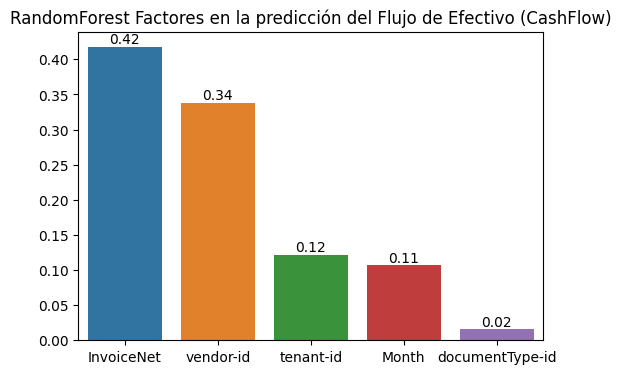

,0
InvoiceNet,0.417636
vendor-id,0.338324
tenant-id,0.121913
Month,0.106729
documentType-id,0.015398


In [59]:
feature_scores_car = pd.DataFrame(pd.Series(modelForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)).T
plt.figure(figsize=(6,4))
sns.barplot(data=feature_scores_car)

for index, value in enumerate(feature_scores_car.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("RandomForest Factores en la predicción del Flujo de Efectivo (CashFlow)")
plt.show()
pd.DataFrame(feature_scores_car.T)

**Prueba de desempeño del Algoritmo de Clasificación mediante una validación cruzada estratificada de 10 repeticiones (k-fold) para estimar la exactitud del modelo. Se obtienen la media y desviacion standard de la exactitud**

In [65]:
models = []
models.append(('RandomForest', RandomForestClassifier(n_estimators=100,random_state=1)))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('\nResultados CrossVal', name)
    print(cv_results,'\n')
    print('%s: %s %f %s (%f)' % (name, 'Exactitud -> Media:',cv_results.mean(), 'DStd',cv_results.std()))


Resultados CrossVal RandomForest
[0.74550205 0.74836102 0.74727658 0.74658648 0.74210085 0.743136
 0.74859509 0.74721483 0.74613034 0.74879227] 

RandomForest: Exactitud -> Media: 0.746370 DStd (0.002142)


**Diagrama de cajas y bigotes del resultado**

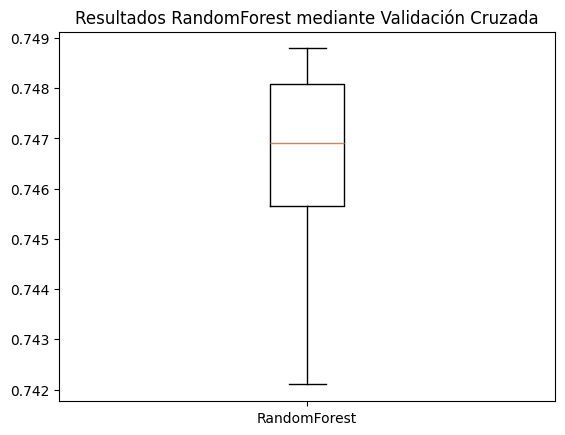

In [67]:
pyplot.boxplot(results, labels=names)
pyplot.title('Resultados RandomForest mediante Validación Cruzada')
pyplot.show()

**Se comparan la Exactitud del modelo con los datos de entrenamiento y de prueba**

In [69]:
#Se prueban los modelos con el conjunto de datos de entrenamiento
trainPredictionsForest = modelForest.predict(X_train)

In [71]:
print('Exactitud obtenida Validacion Forest = ', accuracy_score(Y_validation, predictionsForest))
print('Exactitud obtenida Entrenamiento Forest = ', accuracy_score(Y_train, trainPredictionsForest))

Exactitud obtenida Validacion Forest =  0.7481453365998413
Exactitud obtenida Entrenamiento Forest =  0.9618861711671743


In [72]:
# Exportar a Excel para el Notebook con el Modelo de Regresión
dataregresion.to_excel('dataregresion.xlsx', index=False)

## Evaluación detallada del Modelo RandomForest